In [5]:
import numpy as np
%matplotlib notebook

import matplotlib.pyplot as plt
import csv
from collections import Counter
from matplotlib.pyplot import cm
import math

In [74]:
def parse_csv(filename, age_limit=None):
    '''
    A custom CSV parsing function to process the data in the Marcel format
    
    TODO: Make it possible to store the citations of each conference in their own data structure
    '''
    counters = dict()  # We store the counts of publications in a dictionary, one per conferece year
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')

        for row in reader:
            paper_id = row[0]
            year = int(row[1])
            citations = row[2].split(',')
            if len(citations) == 1:
                # The frontispieces usually have no citations
                continue
            citations = [int(x) for x in citations]
            ages = [year - x for x in citations]

            if year not in counters:
                counters[year] = Counter()
            else:
                for a in ages:
                    if age_limit == None:
                        counters[year][a] += 1
                    elif a < 0:
                        # Don't plot citations of papers that will be published in the future
                        continue
                    elif abs(a) <= age_limit:
                        counters[year][a] += 1
    return counters

In [85]:
def mulitple_plots(counters):
    '''
    Create one plot for each year in the citation Counter object
    '''
    fig, axs = plt.subplots(len(counters))
    i = 0
    color = iter(cm.rainbow(np.linspace(0,1,len(counters))))
    for c in counters:
        this_color = next(color)
        sorted_counter = sorted(counters[c].items(), key=lambda pair: pair[0])
        x = [x[0] for x in sorted_counter]
        y = [x[1] for x in sorted_counter]
        sumy = sum(y)
        y = [q/sumy for q in y]  # normalise
        axs[i].plot(x, y, label=c, color=this_color)
        axs[i].legend(loc='upper right')
        i += 1

    plt.xlabel('Age = Published Year -  Citation year')
    
def single_plot(counters):
    '''
    Create a single plot that puts the data for all years onto a single plot
    '''
    fig, axs = plt.subplots(1)
    color = iter(cm.rainbow(np.linspace(0,1,len(counters))))
    for c in counters:
        this_color = next(color)
        sorted_counter = sorted(counters[c].items(), key=lambda pair: pair[0])
        x = [x[0] for x in sorted_counter]
        y = [x[1] for x in sorted_counter]
        sumy = sum(y)
        y = [q/sumy for q in y]  # normalise
        axs.plot(x, y, label=c, color=this_color)
    axs.legend(loc='upper right')
    plt.xlabel('Age = Published Year -  Citation year')

<IPython.core.display.Javascript object>


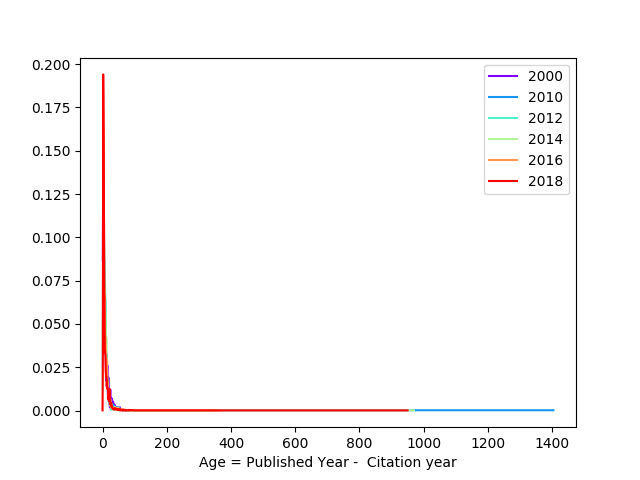

In [88]:
counters = parse_csv('/Users/lvx122/Desktop/acl.csv')
single_plot(counters)

<IPython.core.display.Javascript object>


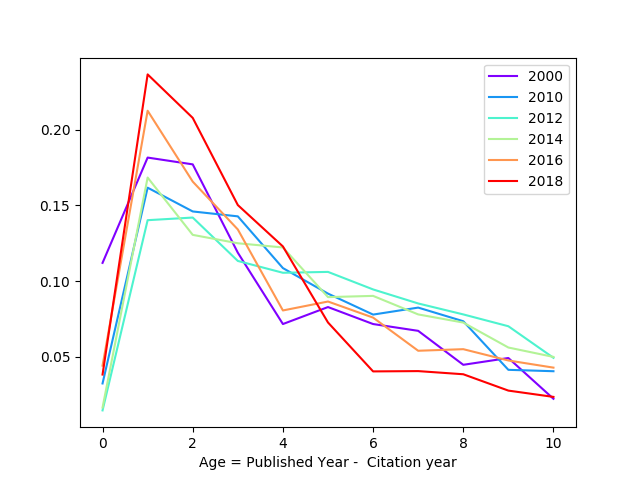

In [87]:
ten_year_counters = parse_csv('/Users/lvx122/Desktop/acl.csv', age_limit=10)
single_plot(ten_year_counters)

<IPython.core.display.Javascript object>


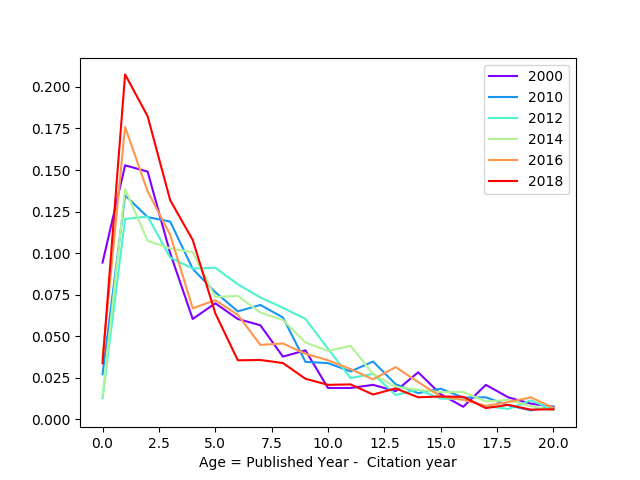

In [86]:
twenty_year_counters = parse_csv('/Users/lvx122/Desktop/acl.csv', age_limit=20)
single_plot(twenty_year_counters)